# Low pass filter

An ideal low-pass filter completely eliminates all frequencies above the cutoff frequency while passing those below unchanged; its frequency response is a rectangular function and is a brick-wall filter. The transition region present in practical filters does not exist in an ideal filter. An ideal low-pass filter can be realized mathematically (theoretically) by multiplying a signal by the rectangular function in the frequency domain or, equivalently, convolution with its impulse response, a sinc function, in the time domain.

https://en.wikipedia.org/wiki/Low-pass_filter

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Butterworth_response.svg/512px-Butterworth_response.svg.png"/>

In [1]:
from helpersmd import fourierTransform
import numpy as np
from plotmd import plotVector
import matplotlib.pyplot as plt
from helpersmd import getScaledDomain

In [2]:
def lpf(fout,m,dt):
    lpw=np.zeros(m+1)
    d=[0.35577019,0.24362830,0.07211497,0.00630165]
    arg=2*fout*dt
    lpw[0]=arg
    arg*=np.pi

    for i in range(1,m+1):
        lpw[i]=np.sin(arg*i)/(np.pi*i)
    lpw[m]/=2
    sumy=lpw[0]
    for i in range(1,m+1):
        sum=d[0]
        arg=(np.pi*i)/m

        for k in range(1,4):
            sum+=2*d[k]*np.cos(arg*k)

        lpw[i]*=sum
        sumy+=2*lpw[i]
    #2m+1
    for i in range(m+1):
        lpw[i]/=sumy
    lpw2=np.fliplr([lpw])[0]
    full_lpw=np.concatenate((lpw2[:-1], lpw), axis=0)
    return full_lpw


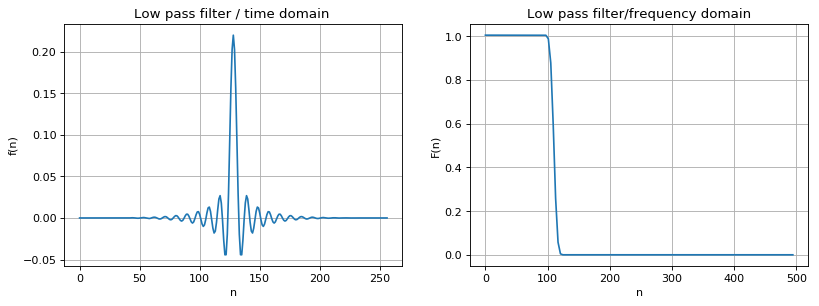

In [3]:
fout=110
m=128
dt=0.001
N=2*m+1

lpw=lpf(fout,m,dt)
Cn_lpw=np.array(fourierTransform(lpw,N)[:N/2])
Cn_lpw=Cn_lpw*(N+1)
fscaled=getScaledDomain(dt,N)[:N/2]

plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(121)
plotVector(lpw,"Low pass filter / time domain ","n","f(n)")
plt.subplot(122)
plotVector(Cn_lpw,"Low pass filter/frequency domain","n","F(n)",X=fscaled)
plt.show()